In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

torch.manual_seed(42)

# rock: 0, paper: 1, scissors: 2
sequence = torch.multinomial(torch.tensor([.5, .3, .2]), 100, replacement=True)
sequence[:100]

tensor([0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0,
        1, 1, 0, 2])

In [27]:
class SlidingDataset(Dataset):
    def __init__(self,
                 sequence: torch.tensor = sequence,
                 block_size: int = 1):

        assert block_size > 0
        self.sequence = sequence
        self.block_size = block_size
    
    def __len__(self):
        return len(self.sequence) - self.block_size
    
    def __getitem__(self, idx):
        return self.sequence[idx:idx+self.block_size], self.sequence[idx+1:idx+self.block_size+1]

In [28]:
l = len(sequence.unique())
A = torch.zeros(l,l)
for i, j in zip(sequence[:-1], sequence[1:]):
    A[j,i] += 1

print(A, end='\n\n')
A /= A.sum(dim=0)

print(A, end='\n\n')

print(A@A@A@A@A)

tensor([[29., 16., 10.],
        [17.,  8.,  2.],
        [10.,  3.,  4.]])

tensor([[0.5179, 0.5926, 0.6250],
        [0.3036, 0.2963, 0.1250],
        [0.1786, 0.1111, 0.2500]])

tensor([[0.5566, 0.5566, 0.5566],
        [0.2708, 0.2708, 0.2707],
        [0.1726, 0.1726, 0.1727]])


In [29]:
embedding = nn.Embedding(3, 3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(embedding.parameters(), lr=.1)

epoch = 1000
for e in range(epoch):
    for x, y in DataLoader(SlidingDataset(block_size=1), batch_size=128):
        optimizer.zero_grad()

        x = x.flatten(0)
        y = y.flatten(0)
        y_hat = embedding(x)
        loss = criterion(y_hat, y)

        loss.backward()
        optimizer.step()

        print(loss, end='\r')

print(A, end='\n\n')
print(embedding.weight.softmax(1).T)

tensor([[0.5179, 0.5926, 0.6250],ckward0>)
        [0.3036, 0.2963, 0.1250],
        [0.1786, 0.1111, 0.2500]])

tensor([[0.5179, 0.5926, 0.6250],
        [0.3036, 0.2963, 0.1250],
        [0.1786, 0.1111, 0.2500]], grad_fn=<PermuteBackward0>)


In [52]:
embedding = nn.Embedding(3, 2)
linear = nn.Linear(2, 3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(embedding.parameters(), lr=.1)

epoch = 1000
for e in range(epoch):
    for x, y in DataLoader(SlidingDataset(block_size=1), batch_size=128):
        optimizer.zero_grad()

        x = x.flatten(0)
        y = y.flatten(0)
        z = embedding(x)
        y_hat = linear(z)
        loss = criterion(y_hat, y)

        loss.backward()
        optimizer.step()

        print(loss, end='\r')

print(A, end='\n\n')
print(linear(embedding(torch.tensor([0,1,2]))).softmax(1).T)

tensor([[0.5179, 0.5926, 0.6250],ckward0>)
        [0.3036, 0.2963, 0.1250],
        [0.1786, 0.1111, 0.2500]])

tensor([[0.5179, 0.5926, 0.6250],
        [0.3036, 0.2963, 0.1250],
        [0.1786, 0.1111, 0.2500]], grad_fn=<PermuteBackward0>)


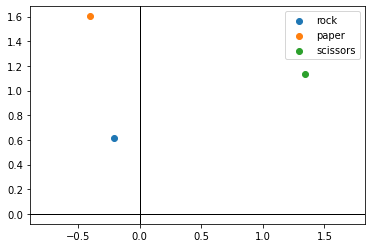

In [68]:
z = embedding(torch.tensor([0,1,2])).detach().cpu()
plt.scatter(*z[0], label='rock')
plt.scatter(*z[1], label='paper')
plt.scatter(*z[2], label='scissors')
plt.axis('equal')
plt.axvline(0, lw=1, c='k')
plt.axhline(0, lw=1, c='k')
plt.legend()
plt.show()